#ECS 171 Project: Detecting Cyber Intrusion on IoT Traffic Data


####Completed by Matthew Armstrong, Karthik Palanisamy, Rahul Prabhu, Matthew Tom, and Kyle Tsuji
#####*Professor Solares, ECS 171: Machine Learning - UC Davis Summer 2023*

##Imports and Data Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# get dataset from github archive
!wget https://github.com/matthewarmstr/ECS-171-Project/raw/main/IoT_Intrusion.zip
!unzip IoT_Intrusion.zip

In [2]:
# load data file
intru_table = pd.read_csv("IoT_Intrusion.csv")
intru_labels_removed = intru_table.drop(columns=['label'])

##Data Preprocessing

In [3]:
# save attribute and label strings
attribute_names = intru_table.columns.drop('label')

intru_label_names = ['Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation', 
                     'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris', 'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation', 
                     'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood', 'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood', 'Mirai-greip_flood', 
                     'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack', 'VulnerabilityScan', 'XSS']

In [4]:
# complete one-hot encoding on intrusion labels
ohe = OneHotEncoder()
ohe_intru_labels = pd.DataFrame(ohe.fit_transform(intru_table['label'].values.reshape(-1,1)).toarray(), columns=intru_label_names)

# normalize traffic attribute data
scaler = MinMaxScaler()
norm_intru_labels_removed = pd.DataFrame(scaler.fit_transform(intru_labels_removed), columns=attribute_names)

# create table with normalized data and string labels (commented for now - alters above variable)
# norm_intru_with_classes = norm_intru_labels_removed
# norm_intru_with_classes['label'] = intru_table['label']

# standardize data
scaler = StandardScaler()
std_intru_labels_removed = pd.DataFrame(scaler.fit_transform(norm_intru_labels_removed), columns=norm_intru_labels_removed.columns)

# create table with standardized data and string labels (commented for now - alters above variable)
# std_intru_with_classes = std_intru_labels_removed
# std_intru_with_classes['label'] = intru_table['label']

In [5]:
# we decided to remove the following attributes since they provide no meaningful contributions to the model
exclude = ['SMTP', 'Telnet', 'IRC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'label', 'Covariance', 'Variance']

relevant = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
         'syn_count', 'fin_count', 'urg_count', 'rst_count', 'IPv', 'LLC', 'DNS', 'SSH', 'TCP', 'UDP',
         'DHCP', 'ARP', 'ICMP', 'IAT', 'Number', 'Mangitue', 'Radius', 'Weight']

##Data Visualization

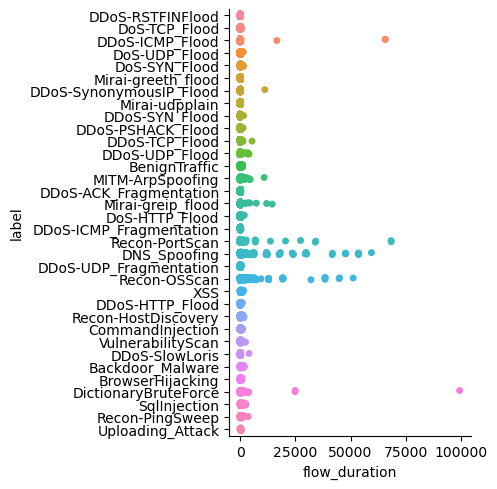

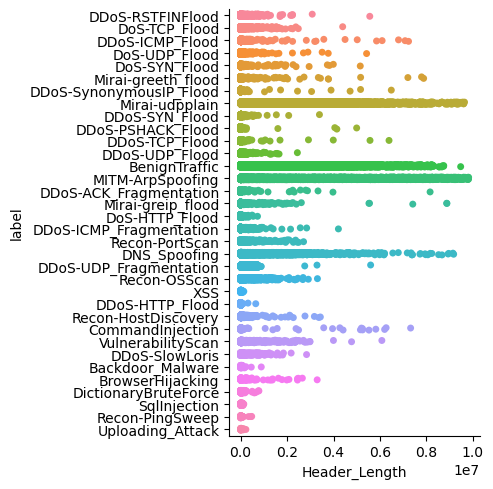

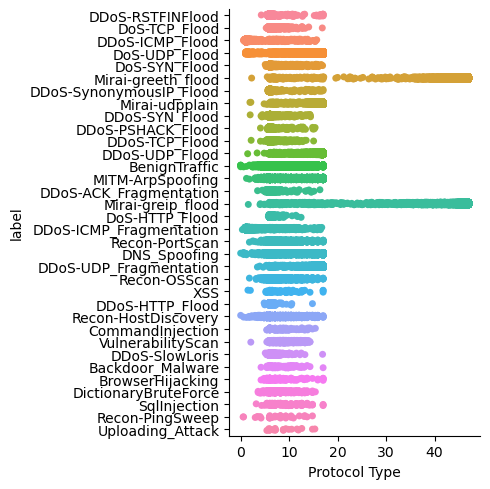

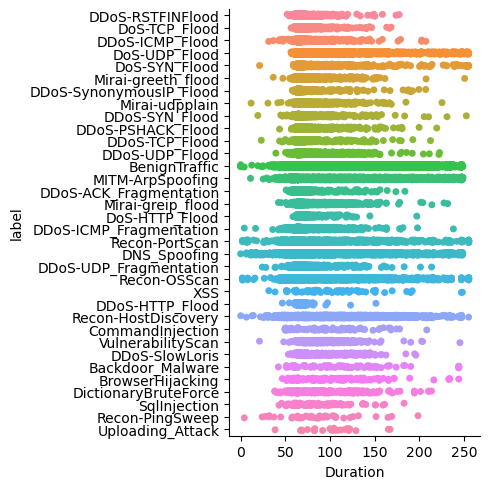

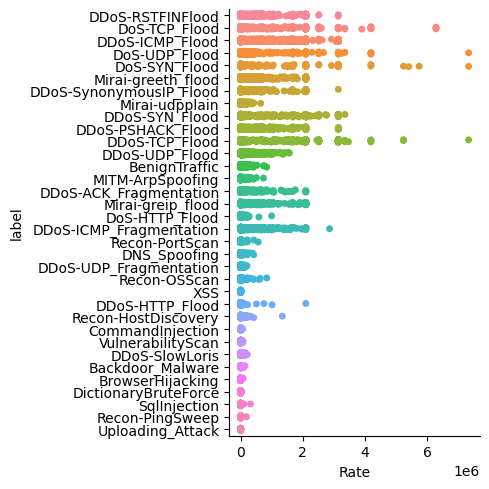

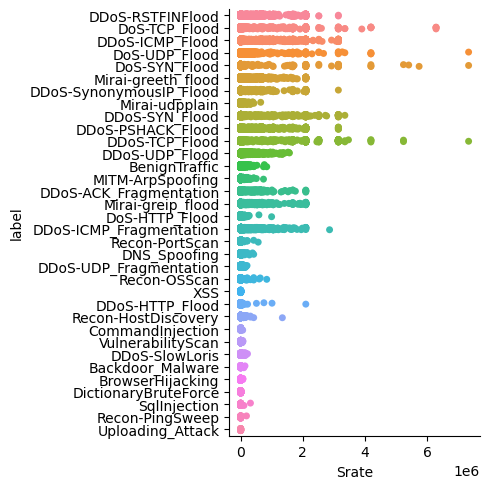

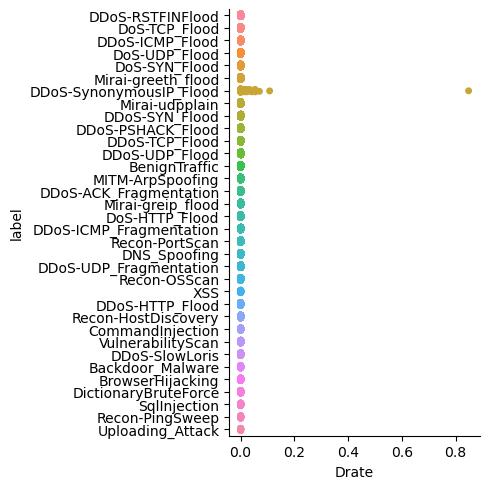

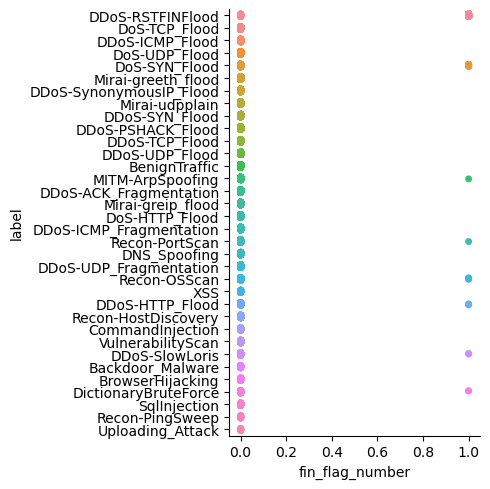

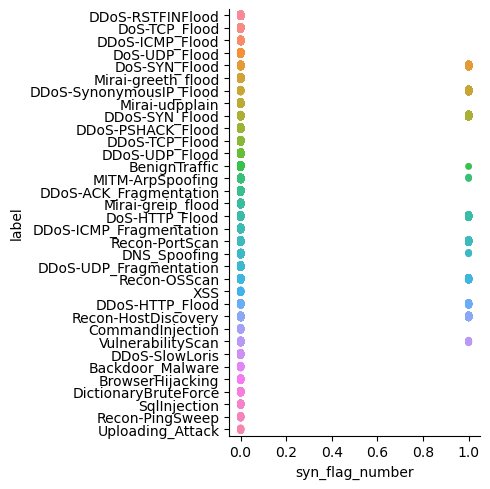

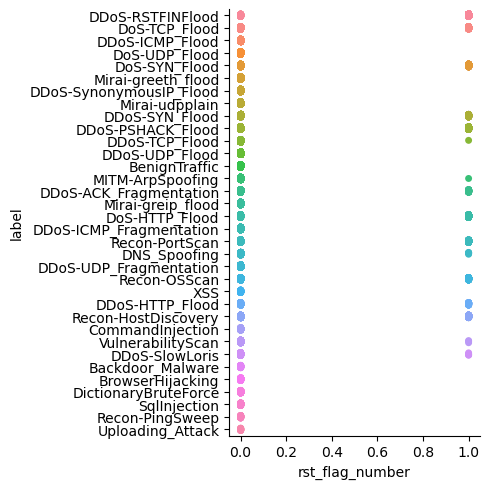

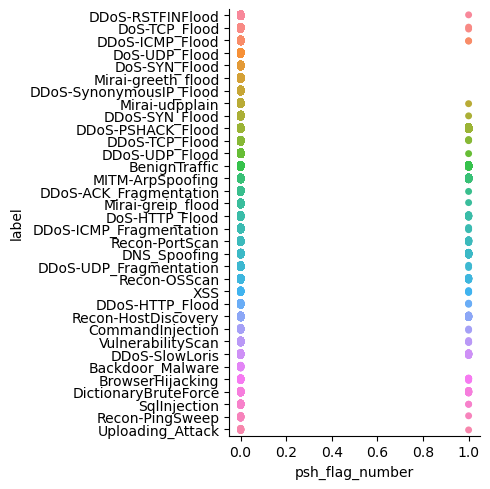

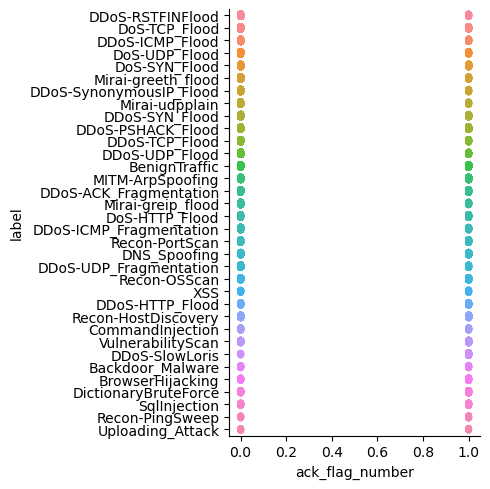

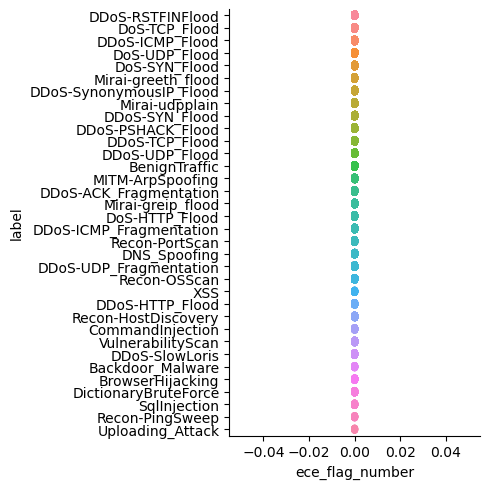

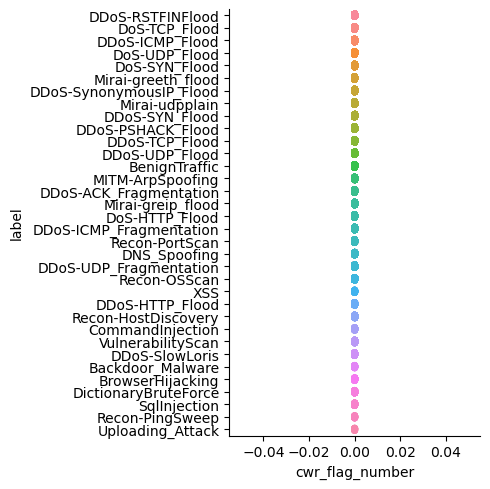

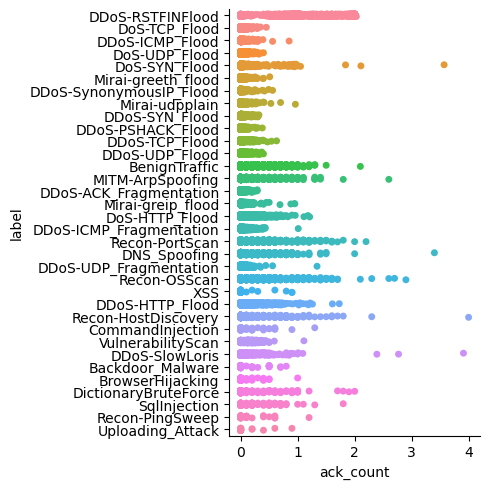

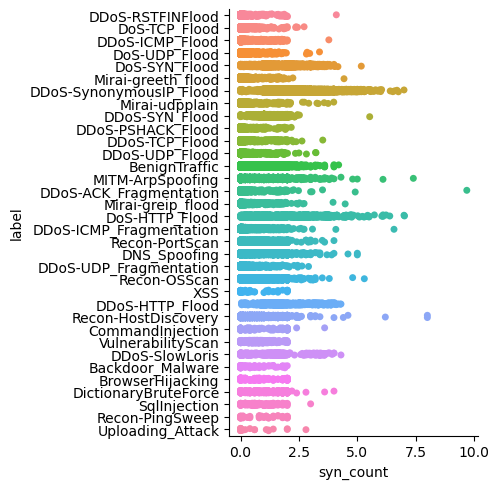

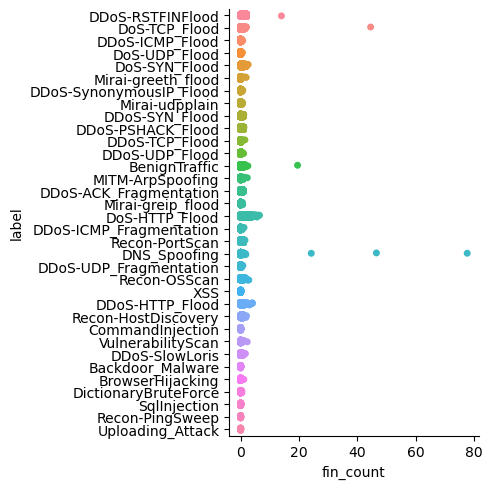

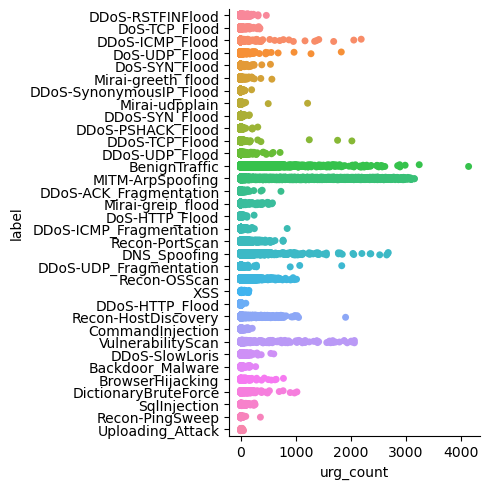

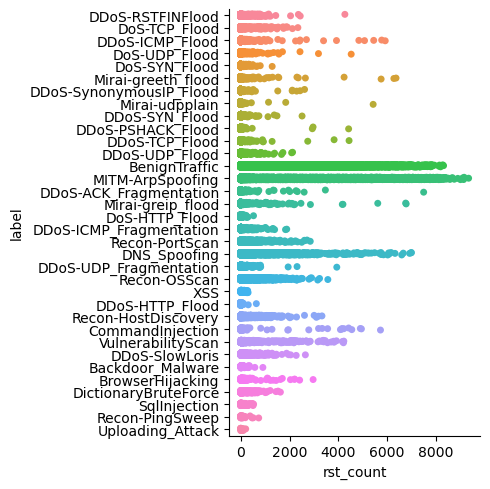

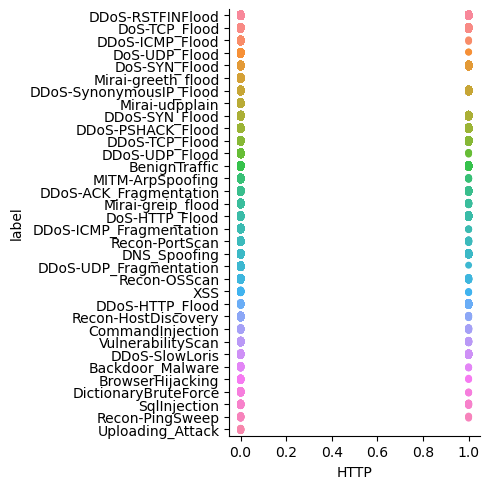

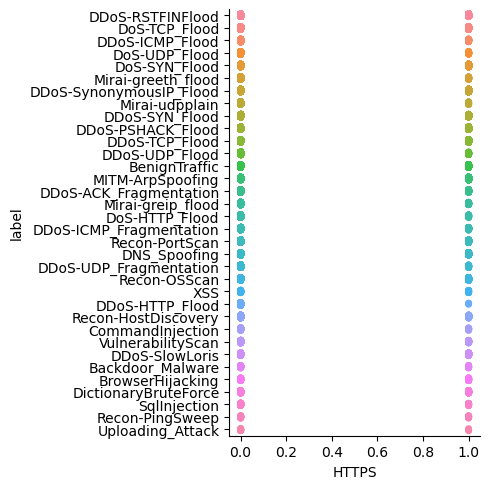

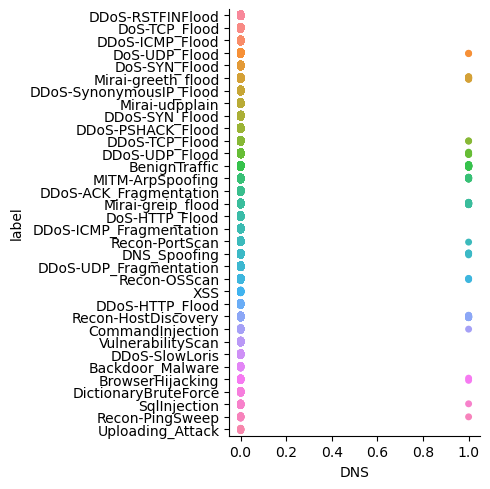

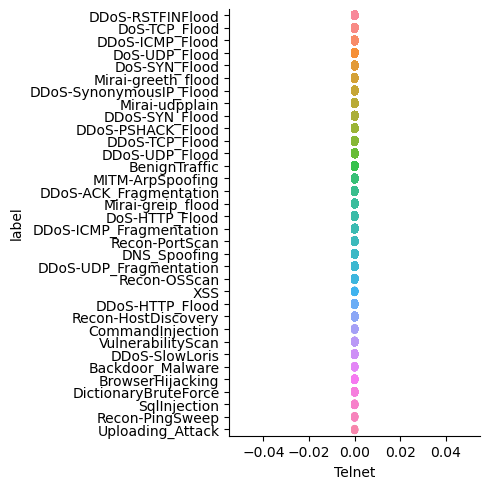

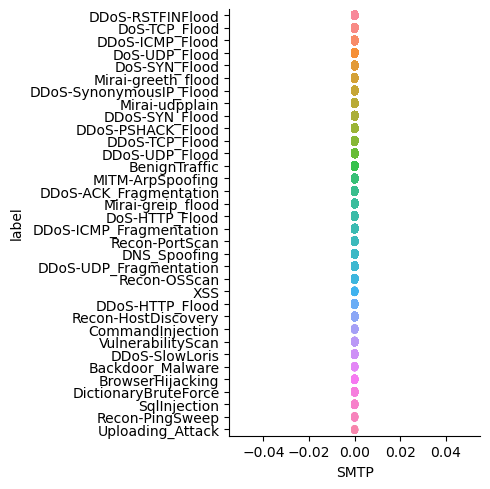

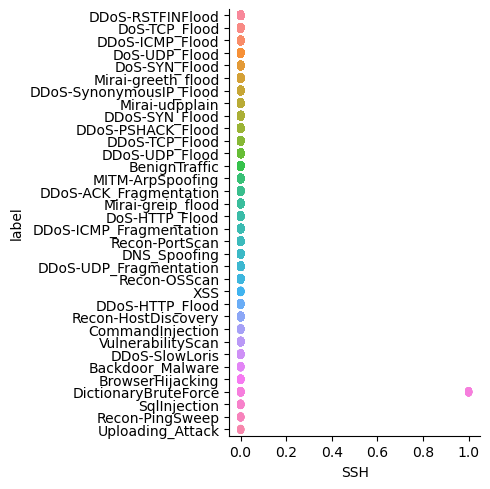

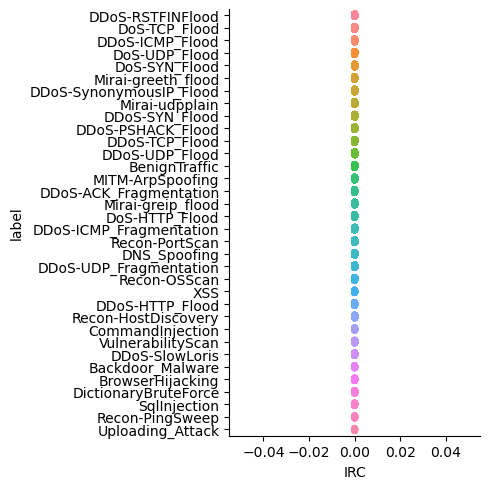

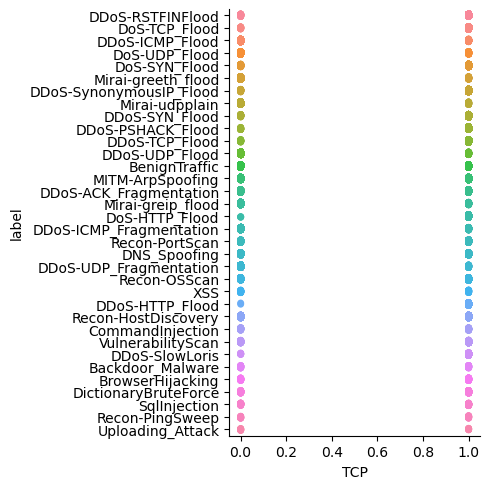

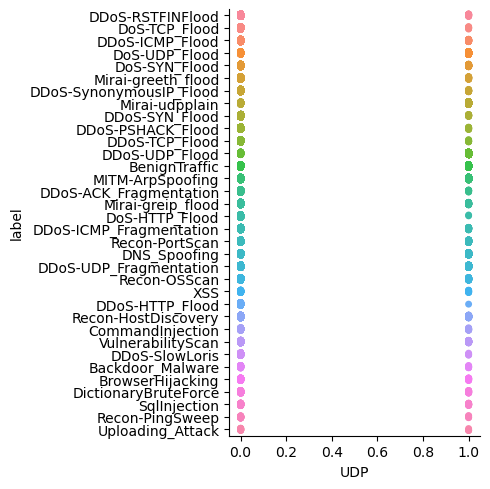

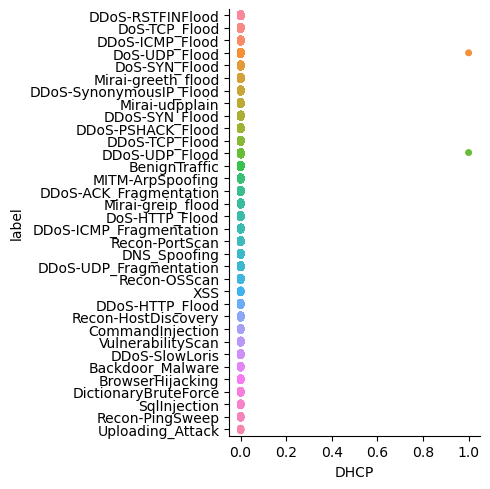

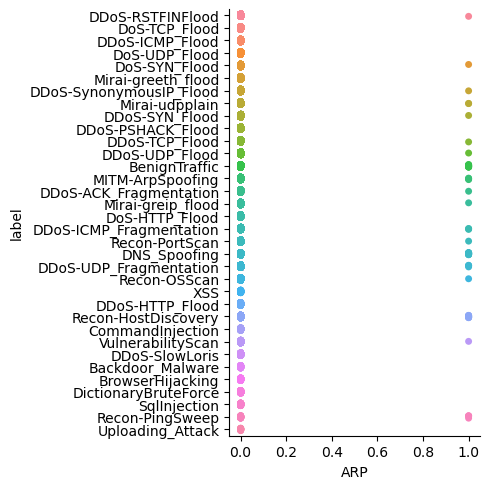

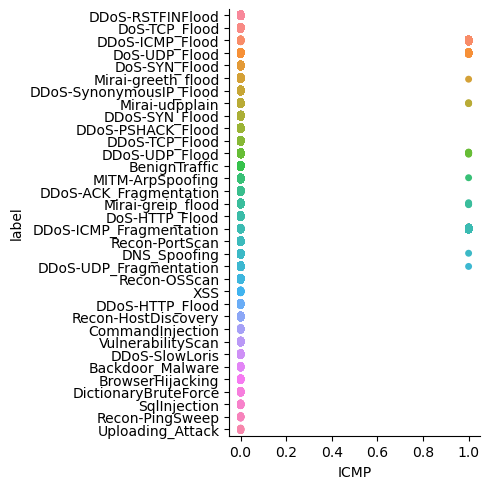

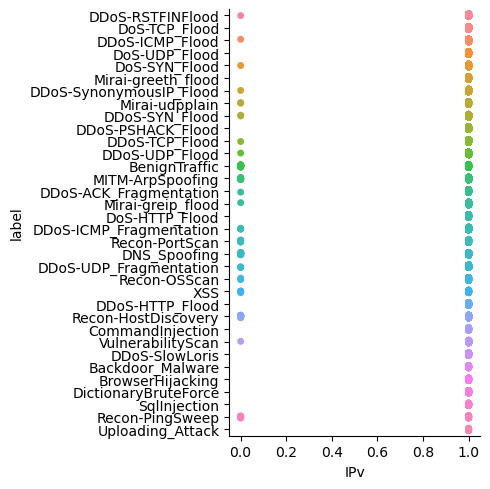

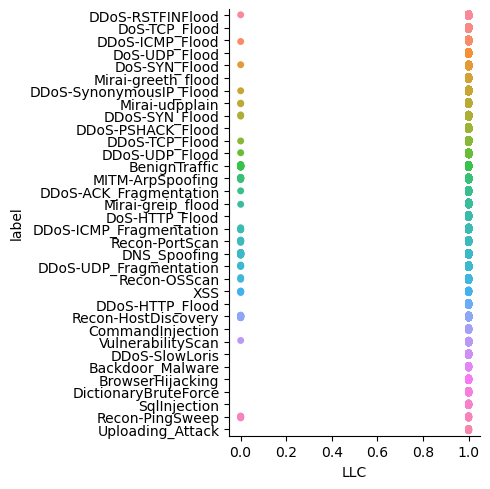

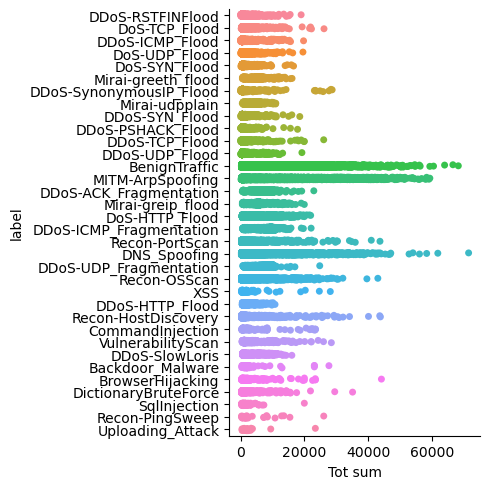

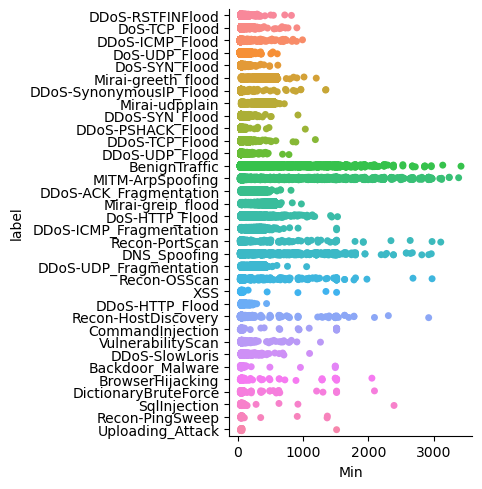

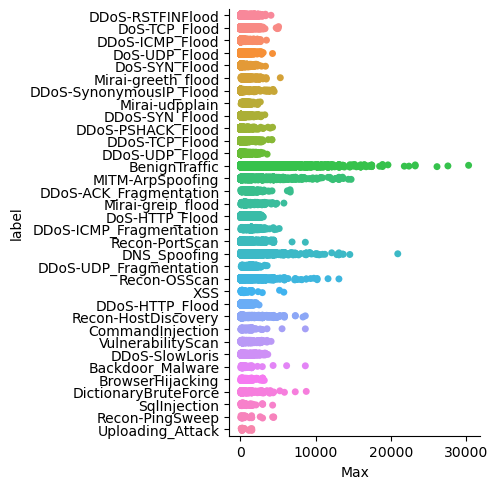

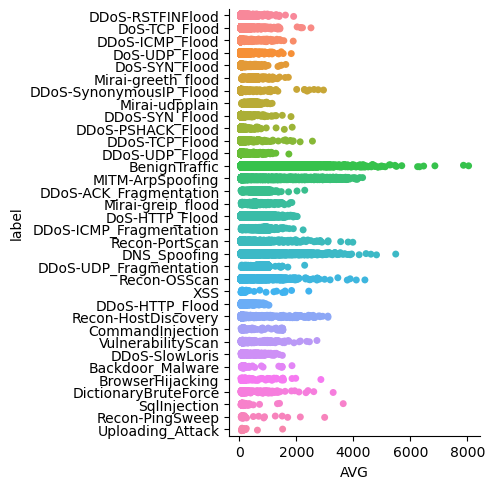

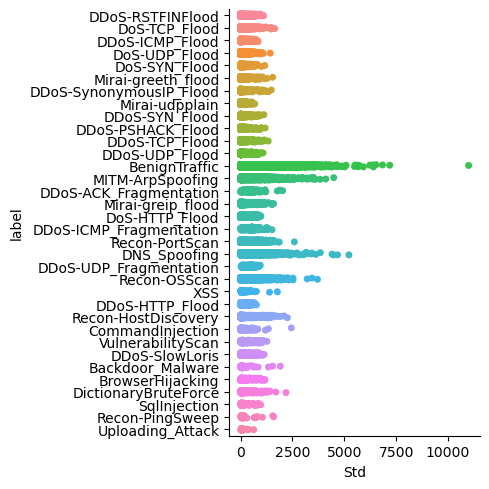

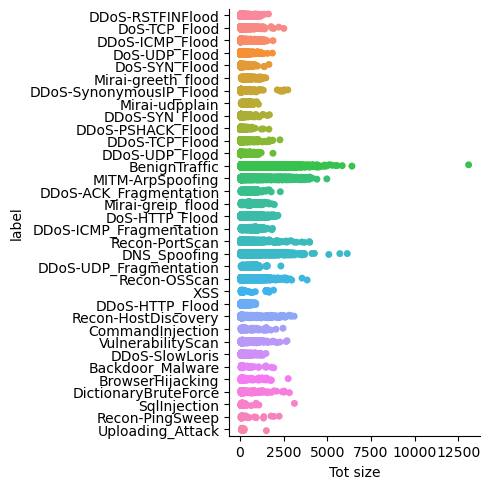

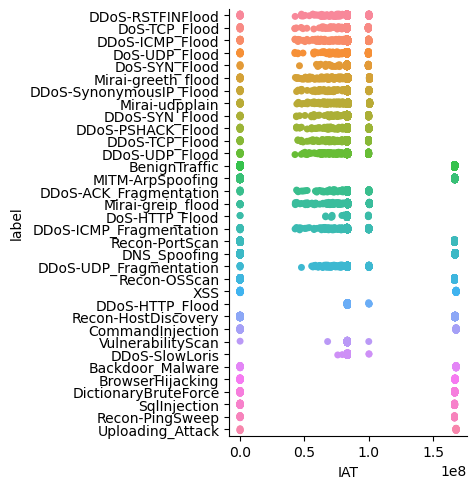

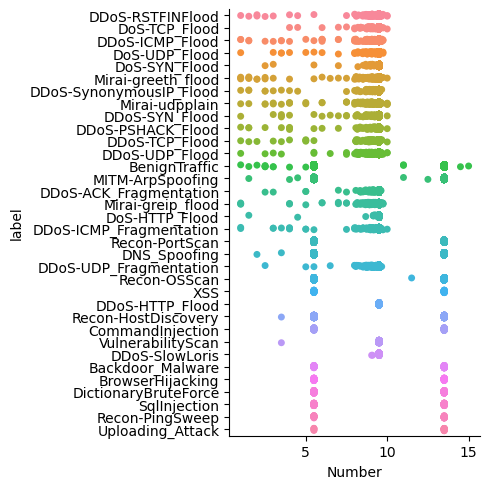

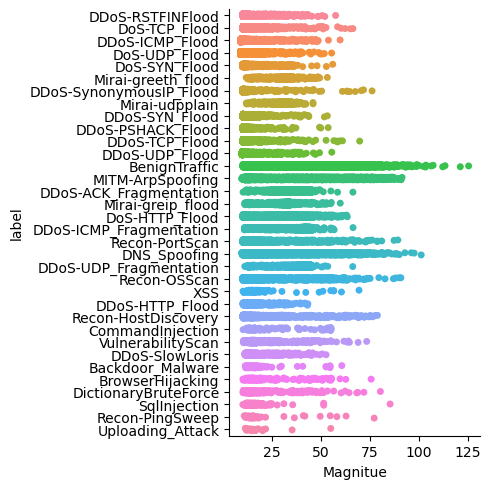

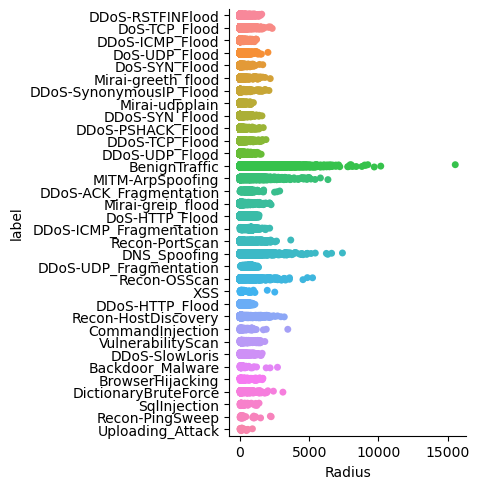

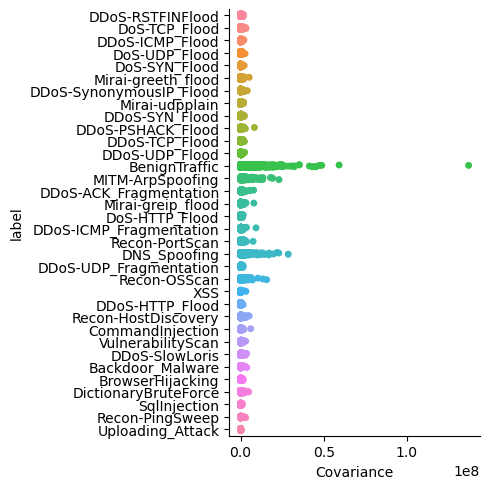

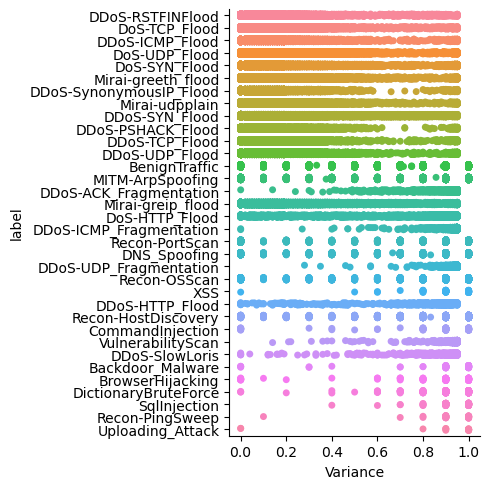

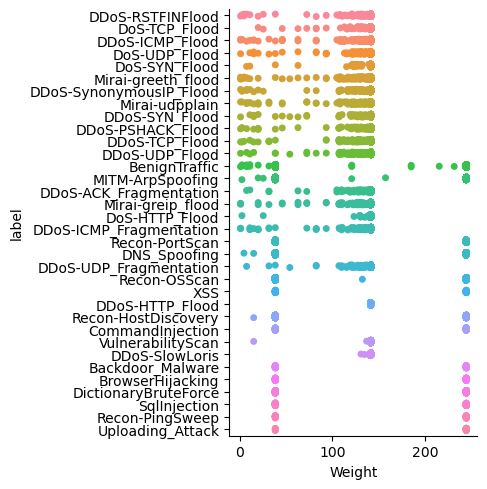

In [5]:
# create catplots showing distributions of outputs against certain inputs (ignore default system warnings)
import warnings
warnings.filterwarnings('ignore')
# for name in intru_table.columns:
#     if name in relevant:
#         sns.catplot(data=intru_table, x=name, y='label')

# create catplots showing distributions of outputs against ALL inputs (ignore default system warnings)
import warnings
warnings.filterwarnings('ignore')
for name in intru_table.columns:
    if name not in ['label']:
        sns.catplot(data=intru_table, x=name, y='label')

##Initial Models (allow more inputs, norm. & standardized)

In [6]:
# NORMALIZED + STANDARDIZED DATA
# remove unwanted data attribute columns
attribute_data = std_intru_labels_removed.drop(columns=['SMTP', 'Telnet', 'IRC'])

# split data
X_train, X_test, y_train, y_test = train_test_split(attribute_data, ohe_intru_labels, train_size=0.9, random_state=5)

# setup neural net for predicting intrusion class
classifier = Sequential()
classifier.add(Dense(units = 43, activation = 'relu', input_dim = 43))
classifier.add(Dense(units = 40, activation = 'relu'))
classifier.add(Dense(units = 37, activation = 'relu'))
classifier.add(Dense(units = 34, activation = 'sigmoid'))
classifier.compile(optimizer = "SGD", loss = 'BinaryCrossentropy')
classifier.fit(X_train.astype(float), y_train, epochs = 10)

Epoch 1/10
29492/29492 [==============================] - 35s 1ms/step - loss: 0.0728
Epoch 2/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0322
Epoch 3/10
29492/29492 [==============================] - 39s 1ms/step - loss: 0.0295
Epoch 4/10
29492/29492 [==============================] - 38s 1ms/step - loss: 0.0283
Epoch 5/10
29492/29492 [==============================] - 35s 1ms/step - loss: 0.0276
Epoch 6/10
29492/29492 [==============================] - 35s 1ms/step - loss: 0.0272
Epoch 7/10
29492/29492 [==============================] - 36s 1ms/step - loss: 0.0269
Epoch 8/10
29492/29492 [==============================] - 55s 2ms/step - loss: 0.0266
Epoch 9/10
29492/29492 [==============================] - 49s 2ms/step - loss: 0.0264
Epoch 10/10
29492/29492 [==============================] - 47s 2ms/step - loss: 0.0262


In [7]:
# measure performance on training data
intru_predictions = pd.DataFrame(((classifier.predict(X_train.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Training Accuracy:", accuracy_score(y_train, intru_predictions))
print("Model Training Precision:", precision_score(y_train, intru_predictions, average='macro'))
print("Model Training Recall:", recall_score(y_train, intru_predictions, average='macro'))
print("Model Training MSE:", mean_squared_error(y_train, intru_predictions))
print(classification_report(y_train, intru_predictions, target_names=ohe_intru_labels.columns))

# measure performance on testing data
intru_predictions = pd.DataFrame(((classifier.predict(X_test.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Testing Accuracy:", accuracy_score(y_test, intru_predictions))
print("Model Testing Precision:", precision_score(y_test, intru_predictions, average='macro'))
print("Model Testing Recall:", recall_score(y_test, intru_predictions, average='macro'))
print("Model Testing MSE:", mean_squared_error(y_test, intru_predictions))
print(classification_report(y_test, intru_predictions, target_names=ohe_intru_labels.columns))

29492/29492 [==============================] - 32s 1ms/step
Model Training Accuracy: 0.7723777361221638
Model Training Precision: 0.4616096828330639
Model Training Recall: 0.3711960976641459
Model Training MSE: 0.012152914236689476
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        68
          BenignTraffic       0.72      0.87      0.79     22033
       BrowserHijacking       0.00      0.00      0.00       126
       CommandInjection       0.00      0.00      0.00        88
 DDoS-ACK_Fragmentation       1.00      0.85      0.92      5796
        DDoS-HTTP_Flood       0.00      0.00      0.00       579
        DDoS-ICMP_Flood       1.00      1.00      1.00    145241
DDoS-ICMP_Fragmentation       1.00      0.97      0.98      9235
      DDoS-PSHACK_Flood       1.00      0.99      0.99     83181
       DDoS-RSTFINFlood       1.00      1.00      1.00     81774
         DDoS-SYN_Flood       0.67      0.95      0.

In [8]:
# NORMALIZED DATA
# remove unwanted data attribute columns
attribute_data = norm_intru_labels_removed.drop(columns=['SMTP', 'Telnet', 'IRC'])

# split data
X_train, X_test, y_train, y_test = train_test_split(attribute_data, ohe_intru_labels, train_size=0.9, random_state=5)

# setup neural net for predicting intrusion class
classifier = Sequential()
classifier.add(Dense(units = 43, activation = 'relu', input_dim = 43))
classifier.add(Dense(units = 40, activation = 'relu'))
classifier.add(Dense(units = 37, activation = 'relu'))
classifier.add(Dense(units = 34, activation = 'sigmoid'))
classifier.compile(optimizer = "SGD", loss = 'BinaryCrossentropy')
classifier.fit(X_train.astype(float), y_train, epochs = 10)

Epoch 1/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.1004
Epoch 2/10
29492/29492 [==============================] - 34s 1ms/step - loss: 0.0510
Epoch 3/10
29492/29492 [==============================] - 35s 1ms/step - loss: 0.0418
Epoch 4/10
29492/29492 [==============================] - 35s 1ms/step - loss: 0.0380
Epoch 5/10
29492/29492 [==============================] - 49s 2ms/step - loss: 0.0360
Epoch 6/10
29492/29492 [==============================] - 47s 2ms/step - loss: 0.0349
Epoch 7/10
29492/29492 [==============================] - 50s 2ms/step - loss: 0.0339
Epoch 8/10
29492/29492 [==============================] - 44s 2ms/step - loss: 0.0331
Epoch 9/10
29492/29492 [==============================] - 39s 1ms/step - loss: 0.0323
Epoch 10/10
29492/29492 [==============================] - 42s 1ms/step - loss: 0.0316


In [9]:
# measure performance on training data
intru_predictions = pd.DataFrame(((classifier.predict(X_train.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Training Accuracy:", accuracy_score(y_train, intru_predictions))
print("Model Training Precision:", precision_score(y_train, intru_predictions, average='macro'))
print("Model Training Recall:", recall_score(y_train, intru_predictions, average='macro'))
print("Model Training MSE:", mean_squared_error(y_train, intru_predictions))
print(classification_report(y_train, intru_predictions, target_names=ohe_intru_labels.columns))

# measure performance on testing data
intru_predictions = pd.DataFrame(((classifier.predict(X_test.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Testing Accuracy:", accuracy_score(y_test, intru_predictions))
print("Model Testing Precision:", precision_score(y_test, intru_predictions, average='macro'))
print("Model Testing Recall:", recall_score(y_test, intru_predictions, average='macro'))
print("Model Testing MSE:", mean_squared_error(y_test, intru_predictions))
print(classification_report(y_test, intru_predictions, target_names=ohe_intru_labels.columns))

29492/29492 [==============================] - 27s 923us/step
Model Training Accuracy: 0.6344666886365298
Model Training Precision: 0.3233841882611061
Model Training Recall: 0.26602487054428847
Model Training MSE: 0.014877497235742845
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        68
          BenignTraffic       0.67      0.65      0.66     22033
       BrowserHijacking       0.00      0.00      0.00       126
       CommandInjection       0.00      0.00      0.00        88
 DDoS-ACK_Fragmentation       0.00      0.00      0.00      5796
        DDoS-HTTP_Flood       0.00      0.00      0.00       579
        DDoS-ICMP_Flood       1.00      1.00      1.00    145241
DDoS-ICMP_Fragmentation       1.00      0.97      0.99      9235
      DDoS-PSHACK_Flood       0.99      0.98      0.99     83181
       DDoS-RSTFINFlood       1.00      1.00      1.00     81774
         DDoS-SYN_Flood       0.62      0.22     

##Initial Models (allow FEWER inputs, norm. & standardized)

In [10]:
# NORMALIZED + STANDARDIZED DATA
# remove unwanted data attribute columns
attribute_data = std_intru_labels_removed.drop(columns=['SMTP', 'Telnet', 'IRC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'Covariance', 'Variance'])

# split data
X_train, X_test, y_train, y_test = train_test_split(attribute_data, ohe_intru_labels, train_size=0.9, random_state=5)

# setup neural net for predicting intrusion class
classifier = Sequential()
classifier.add(Dense(units = 36, activation = 'relu', input_dim = 35))
classifier.add(Dense(units = 35, activation = 'relu'))
classifier.add(Dense(units = 34, activation = 'sigmoid'))
classifier.compile(optimizer = "SGD", loss = 'BinaryCrossentropy')
classifier.fit(X_train.astype(float), y_train, epochs = 10)

Epoch 1/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0771
Epoch 2/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0353
Epoch 3/10
29492/29492 [==============================] - 31s 1ms/step - loss: 0.0316
Epoch 4/10
29492/29492 [==============================] - 31s 1ms/step - loss: 0.0300
Epoch 5/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0292
Epoch 6/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0286
Epoch 7/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0282
Epoch 8/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0278
Epoch 9/10
29492/29492 [==============================] - 32s 1ms/step - loss: 0.0276
Epoch 10/10
29492/29492 [==============================] - 31s 1ms/step - loss: 0.0273


In [11]:
# measure performance on training data
intru_predictions = pd.DataFrame(((classifier.predict(X_train.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Training Accuracy:", accuracy_score(y_train, intru_predictions))
print("Model Training Precision:", precision_score(y_train, intru_predictions, average='macro'))
print("Model Training Recall:", recall_score(y_train, intru_predictions, average='macro'))
print("Model Training MSE:", mean_squared_error(y_train, intru_predictions))
print(classification_report(y_train, intru_predictions, target_names=ohe_intru_labels.columns))

# measure performance on testing data
intru_predictions = pd.DataFrame(((classifier.predict(X_test.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Testing Accuracy:", accuracy_score(y_test, intru_predictions))
print("Model Testing Precision:", precision_score(y_test, intru_predictions, average='macro'))
print("Model Testing Recall:", recall_score(y_test, intru_predictions, average='macro'))
print("Model Testing MSE:", mean_squared_error(y_test, intru_predictions))
print(classification_report(y_test, intru_predictions, target_names=ohe_intru_labels.columns))

29492/29492 [==============================] - 23s 764us/step
Model Training Accuracy: 0.7615079520661385
Model Training Precision: 0.4719804700330022
Model Training Recall: 0.3664818168259058
Model Training MSE: 0.012679742163481339
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        68
          BenignTraffic       0.70      0.83      0.76     22033
       BrowserHijacking       0.00      0.00      0.00       126
       CommandInjection       0.00      0.00      0.00        88
 DDoS-ACK_Fragmentation       0.99      0.70      0.82      5796
        DDoS-HTTP_Flood       0.00      0.00      0.00       579
        DDoS-ICMP_Flood       1.00      1.00      1.00    145241
DDoS-ICMP_Fragmentation       1.00      0.97      0.98      9235
      DDoS-PSHACK_Flood       0.99      0.98      0.99     83181
       DDoS-RSTFINFlood       1.00      1.00      1.00     81774
         DDoS-SYN_Flood       0.66      0.94      

In [12]:
# NORMALIZED DATA
# remove unwanted data attribute columns
attribute_data = norm_intru_labels_removed.drop(columns=['SMTP', 'Telnet', 'IRC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'Covariance', 'Variance'])

# split data
X_train, X_test, y_train, y_test = train_test_split(attribute_data, ohe_intru_labels, train_size=0.9, random_state=5)

# setup neural net for predicting intrusion class
classifier = Sequential()
classifier.add(Dense(units = 36, activation = 'relu', input_dim = 35))
classifier.add(Dense(units = 35, activation = 'relu'))
classifier.add(Dense(units = 34, activation = 'sigmoid'))
classifier.compile(optimizer = "SGD", loss = 'BinaryCrossentropy')
classifier.fit(X_train.astype(float), y_train, epochs = 10)

Epoch 1/10
29492/29492 [==============================] - 35s 1ms/step - loss: 0.1092
Epoch 2/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0590
Epoch 3/10
29492/29492 [==============================] - 34s 1ms/step - loss: 0.0483
Epoch 4/10
29492/29492 [==============================] - 34s 1ms/step - loss: 0.0440
Epoch 5/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0420
Epoch 6/10
29492/29492 [==============================] - 34s 1ms/step - loss: 0.0407
Epoch 7/10
29492/29492 [==============================] - 33s 1ms/step - loss: 0.0399
Epoch 8/10
29492/29492 [==============================] - 34s 1ms/step - loss: 0.0394
Epoch 9/10
29492/29492 [==============================] - 37s 1ms/step - loss: 0.0390
Epoch 10/10
29492/29492 [==============================] - 35s 1ms/step - loss: 0.0386


In [13]:
# measure performance on training data
intru_predictions = pd.DataFrame(((classifier.predict(X_train.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Training Accuracy:", accuracy_score(y_train, intru_predictions))
print("Model Training Precision:", precision_score(y_train, intru_predictions, average='macro'))
print("Model Training Recall:", recall_score(y_train, intru_predictions, average='macro'))
print("Model Training MSE:", mean_squared_error(y_train, intru_predictions))
print(classification_report(y_train, intru_predictions, target_names=ohe_intru_labels.columns))

# measure performance on testing data
intru_predictions = pd.DataFrame(((classifier.predict(X_test.astype(float))) > 0.5).astype(int), columns=ohe_intru_labels.columns)
print("Model Testing Accuracy:", accuracy_score(y_test, intru_predictions))
print("Model Testing Precision:", precision_score(y_test, intru_predictions, average='macro'))
print("Model Testing Recall:", recall_score(y_test, intru_predictions, average='macro'))
print("Model Testing MSE:", mean_squared_error(y_test, intru_predictions))
print(classification_report(y_test, intru_predictions, target_names=ohe_intru_labels.columns))

29492/29492 [==============================] - 25s 861us/step
Model Training Accuracy: 0.582813491756533
Model Training Precision: 0.18855500564270455
Model Training Recall: 0.19765526085155874
Model Training MSE: 0.016860020785144397
                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00        68
          BenignTraffic       0.70      0.66      0.68     22033
       BrowserHijacking       0.00      0.00      0.00       126
       CommandInjection       0.00      0.00      0.00        88
 DDoS-ACK_Fragmentation       0.00      0.00      0.00      5796
        DDoS-HTTP_Flood       0.00      0.00      0.00       579
        DDoS-ICMP_Flood       0.94      1.00      0.97    145241
DDoS-ICMP_Fragmentation       0.00      0.00      0.00      9235
      DDoS-PSHACK_Flood       0.98      0.98      0.98     83181
       DDoS-RSTFINFlood       1.00      1.00      1.00     81774
         DDoS-SYN_Flood       0.00      0.00     

Note from Matthew A: I created 4 models to test the combinations of training with all / limited inputs, along with training the model with standardized / non-standardized (just normalized) data. The models that considered all 43 valid inputs were given 3 hidden layers (43, 40, 37 nodes), while the second two models that included 35 valid inputs was structured with 2 hidden layers (36, 35 nodes). This was done to give the model pairs equivalent complexity since one set used 43 inputs while the other used 35. All models were given the same number of output nodes to predict the same 34 intrusion classes. The data preprocessing / visualization sections were cleaned up to handle normalization and standardization, along with generating catplots for all inputs (simplifies identification of unwanted inputs for report). Standardizing the input data had a significant positive affect on each neural net's performance as seen by the average accuracy, precision, and recall scores all improving by over 10%. The ReLU activation function was used for the hidden layer nodes followed by a sigmoid function for the final output layer. Using the ReLU functions improved the neural net's performance substantially compared to using all sigmoid functions. There are many improvements that can be made to the neural network's internal hidden layer node structure and/or training process since many of the output intrusion classes are never set to true when predicting from the training and testing dataset (leading to entries of 0 in the classification report).

After some thought, I think it might be ok to leave in the "unknown" data columns such as 'Tot Sum', 'Min', 'Max', and such through 'Variance' and 'Covariance'. I believe these columns may be related to the timing distribution of packets within the surveyed traffic (or similar characteristics).